![udlogo.png](img/logo1.png)

![logo3.png](img/logo3.png)

## 金融数据预测基础

金融数据往往是按照时间变化的数据，他的预测一定与历史数据的变化趋势有关。所以，与历史数据间存在依赖关系的算法解答就可以归纳为 时间序列模型。

比如 天气预测、金融计量、地震预测等等等等，都是时间序列模型。

### 什么是时间序列模型

股票数据 的预测，是非常典型的 时间序列模型。
他的特点在于，通过过去时间的变化来预测未来时间的变化。

**什么是时间序列模型？**

关键点：
* 往往单个 项目 的过去变化来预测未来

在计算 时间序列模型 时，我们可以采用 统计学模型 或者 其他模型；我们今天会通过 python 来简单介绍下述几个模型；

### 股票价格
关于股票，首先要聊聊收盘价格的含义。
股票的价格分为
- opening price，开盘价
- closing price，收盘价
- adjusted closing，复权收盘价，

开盘价、收盘价都挺好理解的；

👇这张图，用来解释为什么需要复权。
![logo1.png](img/fuqian.JPEG)
由于股票分割，股票的交易价格会突然下跌，并且这个股价的变化不是真实的价格变化，是股票股数拆分之后的影响。

因此，我们需要消除复权影响，将股票分红（在某一天突然增加了股票的价格等），或者股票分割（比如 10股分1股，股票价格就瞬间降低了），以及一些由于市场熔断机制等造成的异常值移除。这样，对于复权的调整，就是为了技术性指标的连续性，也是为了预测的准确性。

### 常用的股票预测

股票价格的预测，属于 二级混沌市场，就是：对于一项进程所做出的预测，会影响该进程的演化。

如何理解呢？换言之，一级混沌市场，就是一项进程所做出的预测，不会影响该进程的演化。比如天气情况，你预测出明天下雨，不会影响明天是否会下雨。

二级混沌市场，比如 股票价格。如果预测出明天的股票会上涨概率5%，那就会有更多人都去购买这个股票，那真实的上涨概率会大于 5%。因此，二级混沌市场的预测，会真实的影响实际的值。

股票市场的预测有两种基础理论：
- 价值投资，基于公司运营，成长情况，发展潜力来长期投资一家公司的未来；比如 巴菲特就是这样的；
- 价格投资，基于 k线等价格变化趋势，快速预判市场的变化，通常为中短期预测；

在价格投资中，股票的市场价格变化就是非常重要的趋势判断依据。

我们在应用这个“价值投资”这个理论的时候，我们通常会使用 开盘价-开盘价，或 收盘价-收盘价 来计算，但是 股价的突然变化不应该被记录成为正常的价格变化趋势，因此我们会使用复权后的价格来获得较为平滑的趋势。

### 数据准备 & 安装

我们在这里使用了 Tushare 财经数据包。这个*财经数据包*包含了很多的数据，
- 沪深股票交易数据（开盘、收盘、复权等）
- 沪深投资参考数据（融资、限售、新股数据等）
- 股票分类数据（概念分类、行业分类等）
- 基本面数据（公司业绩报告、运营能力、成长能力等）
- 宏观经济数据（年度国民GDP、季度GDP、存贷款利率等）
- 新闻事件数据（新浪股吧、即时新闻等）
- 等等等

这个数据包的数据与python衔接较好，

详细的可以看 链接 http://tushare.org/index.html

#### 安装
* Mac 在 terminal 内
* Window 在 cmd 内
```
pip install pandas
pip install lxml
pip install tushare
```

#### 其他数据接口
如果想要使用全球的金融数据，我们也可以使用一个叫
- pandas-datareader的接口 

这个接口中，我们可以直接通过python获取以下各种数据源：
- Google Finance
- Morningstar
- IEX
- Robinhood
- Enigma
- Quandl
- St.Louis FED (FRED)
- Kenneth French’s data library
- World Bank
- OECD
- Eurostat
- Thrift Savings Plan
- Nasdaq Trader symbol definitions
- Stooq
- MOEX

详细的请求方式可见⬇️：
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-google

## 股票价格的时间序列预测实现
### 获得股票的历史数据

In [25]:
!python -m pip install tushare

In [26]:
my_token = 'fbc3938546f5575b9613086181551a878e5dfe65ea8cacd86fcbd5cc'

In [27]:
# 通过下述方式来读入 编号为600848 的股票 - 上海临港
import tushare as ts

ts.set_token(my_token)

pro = ts.pro_api()

#df = df = ts.get_h_data('002337') #前复权#一次性获取全部日k线数据#前复权#一次性获取全部日k线数据
#df.head()

df = ts.pro_bar(ts_code='002027.SZ', adj='qfq', start_date='20181218', end_date='20191210')
df[:5]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002027.SZ,20191210,5.60,5.64,5.52,5.60,5.61,-0.01,-0.1783,618141.80,345474.678
1,002027.SZ,20191209,5.65,5.72,5.60,5.61,5.64,-0.03,-0.5319,699323.47,394983.293
2,002027.SZ,20191206,5.74,5.75,5.62,5.64,5.75,-0.11,-1.9130,993424.49,561877.465
3,002027.SZ,20191205,5.75,5.82,5.69,5.75,5.75,0.00,0.0000,735620.18,421762.565
4,002027.SZ,20191204,5.78,5.79,5.66,5.75,5.78,-0.03,-0.5190,564771.31,323075.054


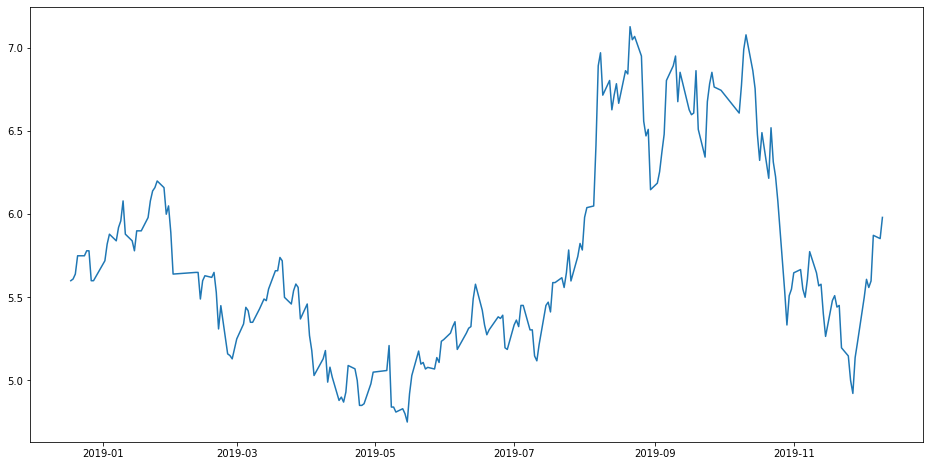

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df.index = pd.to_datetime(df['trade_date'], format='%Y-%m-%d').sort_values()
plt.figure(figsize=(16,8))
plt.plot(df.close, label='Close Price History')
plt.show()

### 自回归模型（AutoRegression model，AR）
在介绍模型之前，需要了解一个背景概念，*稳定的*时间序列。稳定：数学意义为，该数据的mean及std在一段时间不变。

在模型中，仅使用单个股票的历史数据的叫单变量时间序列模型，如果使用多个股票的历史数据的叫多变量时间序列模型。在AR模型中，使用linear regression的方式来得到每一个t-i项的拟合系数。

举个例子，下图第二列是一个股票在t日交易收盘价，第二至第四列是第一列向下平移一格之后的结果。因此从day4开始（黄色网格），就有了3个历史数据。针对day4-day8，我们就可以使用线性回归模型来拟合t-1、t-2、t-3的价格对t当日的预测模型。最终的预测使用t-1、t-2、t-3三项中pvalue<0.05的参数。

In [29]:
### 提取数据
ar = df['close'].copy().to_frame()
ar['ori_close'] = ar['close']
ar.shape

(238, 2)

⬆️
- 务必记得 copy，否则可能会改变原数据
- 仅提取一列，则是series，转成 dataframe 方便后续操作

In [48]:
!pip freeze

absl-py==0.8.0
addict==2.2.1
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
appdirs==1.4.3
asn1crypto==0.24.0
astor==0.8.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autopep8==1.4.4
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bitarray==0.9.3
bkcharts==0.2
black==19.10b0
bleach==3.1.0
bokeh==1.2.0
boto==2.49.0
boto3==1.9.234
botocore==1.12.234
Bottleneck==1.2.1
bz2file==0.98
certifi==2019.11.28
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.1
clyent==1.2.2
colorama==0.4.1
conda==4.7.12
conda-build==3.18.8
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
cymem==1.31.2
Cython==0.29.12
cytoolz==0.9.0.1
dask==2.1.0
decorator==4.4.0
defusedxml==0.6.0
dill==0.2.9
distributed==2.1.0
docutils==0.14


In [30]:
from statsmodels.tsa.ar_model import AR
import numpy as np

for i in range(37):
    signal = ar.iloc[:199+i,0]
    ar_mod = AR(signal)
    ar_res = ar_mod.fit(4)
    #print(i)
    predict_ar = ar_res.predict(199+i,200+i)
    #print(predict_ar.values)
    ar.iloc[200+i,1] = predict_ar.values[-1]


/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning 

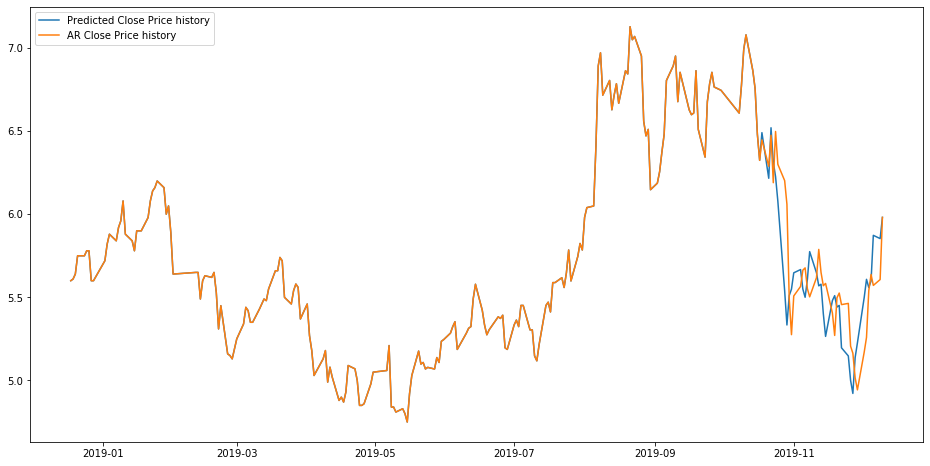

In [31]:
#plot
plt.figure(figsize=(16,8))
plt.plot(ar['close'], label='Predicted Close Price history')
plt.plot(ar['ori_close'], label='AR Close Price history')
plt.legend()
plt.show()

##### <span style="color:rgb(0,178,230)">小练习</span>

在上文中，每个预测值都是 真实值 来直接预测的。因此，请你来计算以下 真实值和预测值之间的差异？

先自己试一下，之后再去看答案。

In [32]:
########################################
#
# 下面为答案
#
########################################
for i in range(37):
    signal = ar.iloc[:199+i,0]
    ar_mod = AR(signal)
    ar_res = ar_mod.fit(4)
    #print(i)
    predict_ar = ar_res.predict(199+i,200+i)
    #print(predict_ar.values)
    ar.iloc[200+i,1] = predict_ar.values[-1]
    

/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning 

### 滑动平均模型（moving average model, MA）

滑动平均模型的一个基本假设是，当前时间序列的数据是稳定的（参见上文中*稳定*的数学含义）。因此当前数据是一段时间的滑动平均值 + 随机白噪声。因此在MA模型中，并不舍涉及线性回归，而只是滑动平均值。这也是MA和AR的最大区别。

举个例子，同样是刚刚那组数据，第三列就是我们的预测数据了，采用的计算方式就是

day(t) = mean(day(t-1) + day(t-2));

In [33]:
### 提取数据
ma = df['close'].copy().to_frame()
ma['ori_close'] = ma['close']
ma.shape[0]

238

In [34]:
### 实现 MA，30个值取均值
import numpy as np

for i in range(30):
    ma.iloc[i+207,1] = np.mean(ma.iloc[176+i:206+i,1])

⬆️上文使用了滑动平均的算法：
- ma.iloc[:,0] ma 列表中的第 1 列是 原始 close price；
- ma.iloc[:,0] ma 列表中的第 2 列是 用于计算 ma 预测值；
- 通过上述循环，我们可以看到 为了不引入 未来函数，我们在计算 ma 预测值的时候，使用 前预测值 计算的 后预测值；

此处解释 未来函数：
- 时间序列预测里面，在回测过程中，切忌用将来的数据来预测现在的值，这样会得到过拟合的数据；

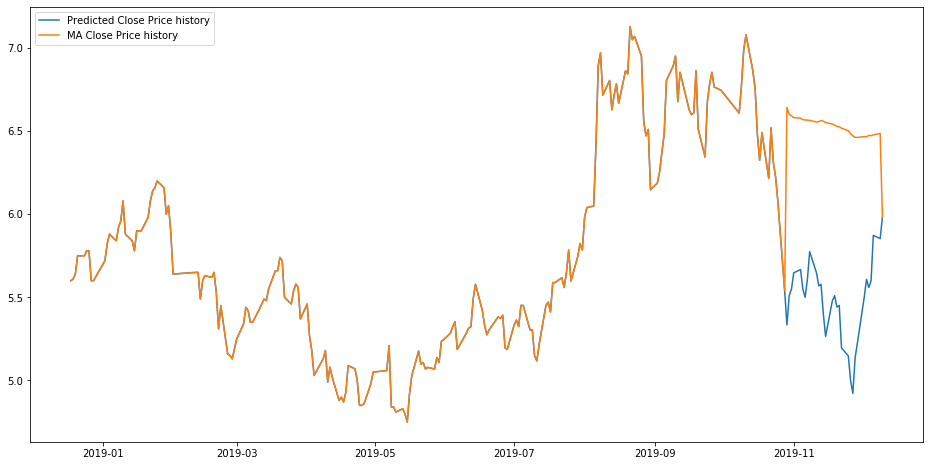

In [35]:
#plot
plt.figure(figsize=(16,8))
plt.plot(ma['close'], label='Predicted Close Price history')
plt.plot(ma['ori_close'], label='MA Close Price history')
plt.legend()
plt.show()

##### <span style="color:rgb(0,178,230)">小练习</span>

滑动平均尽管在预测之时，无法提供很好的预测值；

但是我们可以实现一个 50天 均线；你来试一下，实现一个 “过去50天均值的均线作为当天的 ma ”的算法；

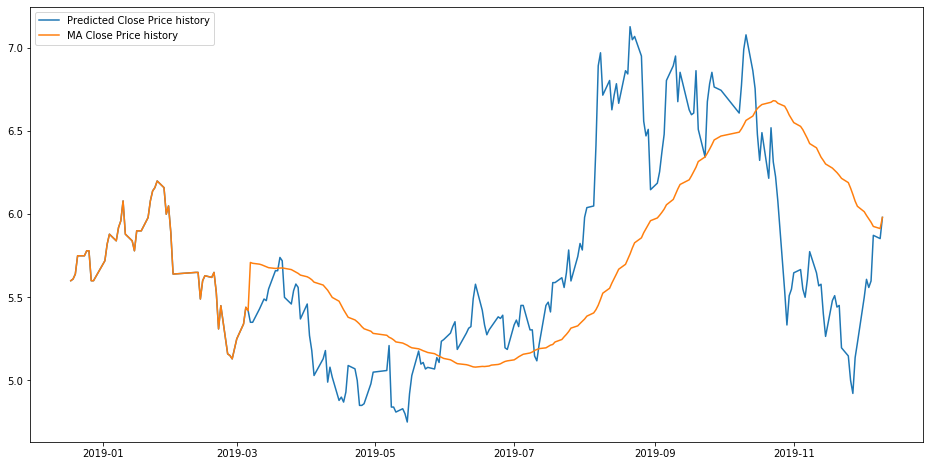

In [36]:
########################################
#
# 下面为答案
#
########################################
for i in range(237-50):
    ma.iloc[i+50,1] = np.mean(ma.iloc[i:50+i,0])
    
#plot
plt.figure(figsize=(16,8))
plt.plot(ma['close'], label='Predicted Close Price history')
plt.plot(ma['ori_close'], label='MA Close Price history')
plt.legend()
plt.show()

50天线往往会被认为是 支撑值；

绘制 支撑线 的意义在于：

在 股票预测中，我们往往会听到 年线支撑、周线支撑之类的概念。他的意义在于，当你使用 50天、100天的数据来做滑动平均之后，这个 MA 会指示一个动量，当 日线 远离动能的时候，日线大概率会返回到支撑线位置；

### 高级时间序列模型ARMA

ARMA - autoregression moving average自回归移动平均

ARMA就是把AR和MA结合在一起的一种算法，如何来理解这个算法呢？

自回归，从物理的角度来理解就是：当前记录与其历史记录的差值。eg，自回归认为历史的发展是一条斜率一定的直线。

移动平均，从物理的角度来理解就是：当前记录是历史记录的均值。eg，移动平均模型认为历史的发展是一条水平的线。

当两者混合在一起，可以认为是一个y=ax+b的过程，自回归提供了a这个系数，移动平均提供了b这个截距。



In [37]:
### 提取数据
arma = df['close'].copy().to_frame()
arma['ori_close'] = arma['close']
arma['diff'] = arma['close'] - arma['close'].shift()
arma.shape[0]

238

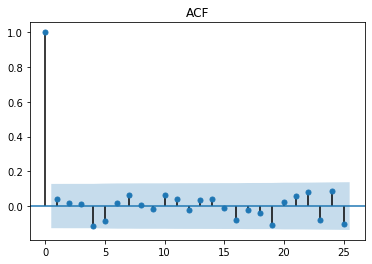

In [38]:
#查看acf与pacf确定q和p，p为自回归项数，q为滑动平均项数，d为使之成为平稳序列所做的差分次数（阶数）。
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(arma['diff'].dropna() ,lags=25)
plt.title('ACF')
acf.show()
#pacf = plot_pacf(arma['diff'].dropna() ,lags=25)
#plt.title('PACF')
#pacf.show()
plt.show()

从上图可以看出，q都是1，diff使用没有查分的部分；因此，我们得到了 ARMA 的参数；

In [39]:
#import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic


model = ARMA(arma['ori_close'].dropna().values, order=(1,0) )# 1是 acf 
result = model.fit(trend='nc', method='css-mle')
pre = result.predict(237,237, dynamic=True)
pre.shape

()

In [40]:
#import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

for i in range(37):
    signal = arma.iloc[:199+i,0]
    model = ARMA(signal.dropna(), order=(1,0) )# 1是 acf, 0阶 差分
    result = model.fit(trend='nc', method='css-mle')
    pre = result.predict(199+i,200+i, dynamic=True)
    arma.iloc[200+i,1] = pre.values[-1]

/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning

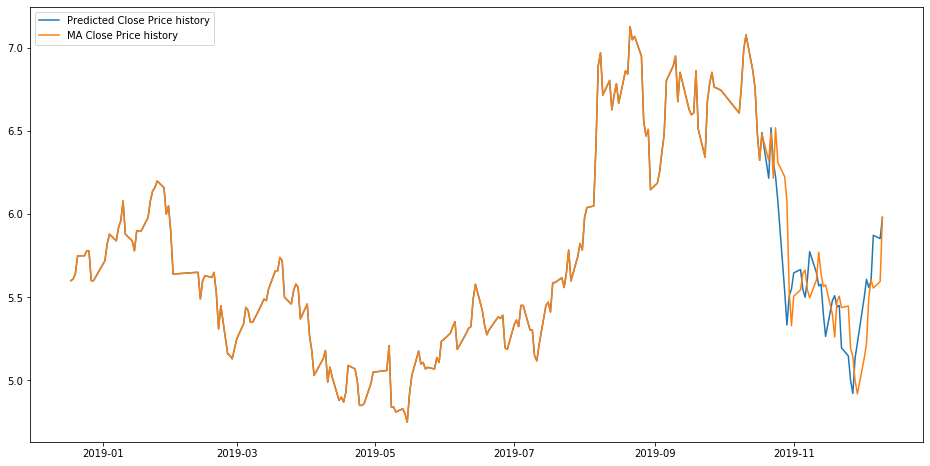

In [41]:
#plot
plt.figure(figsize=(16,8))
plt.plot(arma['close'], label='Predicted Close Price history')
plt.plot(arma['ori_close'], label='MA Close Price history')
plt.legend()
plt.show()

### 高阶差分 ARIMA

那更进一步的，什么是ARIMA？

AIRMA - autoregression intergrated moving average差分自回归移动平均
ARIMA中，I指代的差分，其实是 前后时间上数值的差异，比如 “7 月份的销售额 - 6 月份的销售额” 就是差分的意义；因此ARIMA就是使用差分的数据来进行ARMA建模，这个差分可以是t_difference=1或t_difference=2甚至更大，直到你取得一个稳定的数据集。

In [42]:
### 提取数据
arima = df['close'].copy().to_frame()
arima['ori_close'] = arma['close']
arima['diff'] = arma['close'] - arma['close'].shift()
arima.shape[0]

238

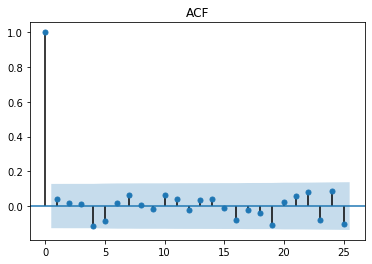

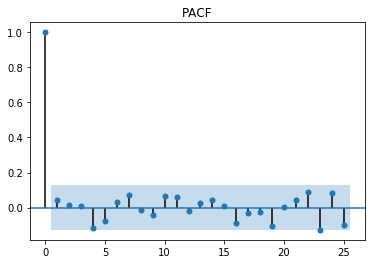

In [43]:
#查看acf与pacf确定q和p，p为自回归项数，q为滑动平均项数，d为使之成为平稳序列所做的差分次数（阶数）。
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(arima['diff'].dropna() ,lags=25)
plt.title('ACF')
acf.show()
pacf = plot_pacf(arima['diff'].dropna() ,lags=25)
plt.title('PACF')
pacf.show()
plt.show()

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(arima['diff'].dropna().values, order=(1,1,1))
result = model.fit(disp=0)
pre = result.forecast()
pre[0][0]

0.009098074952031077

In [45]:
for i in range(37):
    #print(i)
    signal = arima.iloc[:199+i,2]
    model = ARIMA(signal.dropna().values, order=(1,1,1) )# 1是 acf, 0阶 差分
    result = model.fit(disp=0)
    pre = result.forecast()
    arima.iloc[200+i,1] = arima.iloc[199+i,0]+pre[0][0]

/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/houbowei/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


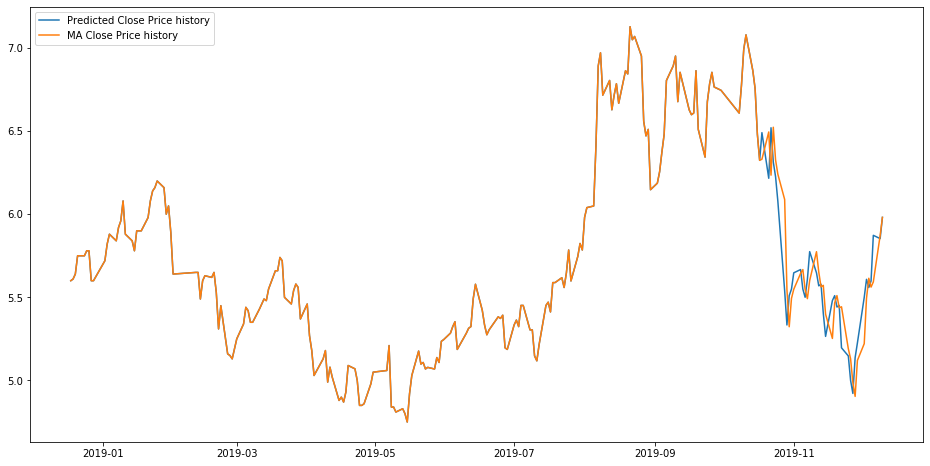

In [46]:
#plot
plt.figure(figsize=(16,8))
plt.plot(arima['close'], label='Predicted Close Price history')
plt.plot(arima['ori_close'], label='MA Close Price history')
plt.legend()
plt.show()

### DA-RNN 来实现股票预测

虽然深度学习已经成功地推动了自然语言处理和图像处理的基本进步，但一个相关问题是该技术是否同样能够成功击败经典统计学和机器学习领域的其他模型以产生新的先进技术。揭示基础数据模式的方法。其中一个领域是金融时间序列的预测，鉴于此类数据流动的变幻无常，这是一个众所周知的难题。在这篇博客中，我为这个问题实现了一个最近提出的模型。对我自己来说，这更像是一个实现真实数据深度学习技术的学习过程，我想与其他人分享我的经验。

> 模型

> 我实施的模型是由基于双阶段注意的基于时间序列预测的递归神经网络提出的。基于双阶段注意的RNN（又名DA-RNN）模型属于非线性自回归外生（NARX）模型的一般类，其基于该系列的历史值加上历史值来预测时间序列的当前值。多个外生时间序列。 NARX模型的线性对应物是具有外生因素的ARMA模型。

> DA-RNN模型中有两个重要概念。第一个是流行的递归神经网络模型，它在NLP领域取得了巨大成功。从高层次来看，RNN模型对于顺序数据展示了非常复杂的动态时间结构非常强大。 RNN模型有多种形式，其中之一是长短期记忆（LSTM）模型，广泛应用于语言模型。第二个概念是注意机制。注意机制在某种程度上以动态方式执行特征选择，因此模型可以在每个时间阶段仅保留最有用的信息。如今许多成功的深度学习模型将注意机制与RNN结合在一起，其中包括机器翻译。

> DA-RNN模型在高层次上包括两个具有注意机制的LSTM网络。第一个LSTM网络对历史外生数据中的信息进行编码，其注意机制执行特征选择以选择最重要的外生因素。基于第一LSTM网络的输出，第二LSTM网络进一步将来自外生数据的信息与历史目标时间序列组合。第二网络中的关注机制在时域中执行特征选择，即，它将权重应用于不同历史时间点的信息。因此，最终预测是基于外部因素和时间维度的特征选择。与统计模型中的经典特征选择不同，DA-RNN动态选择特征。换句话说，因素和时间点的权重随时间而变化。或许，一个不准确的类比是具有ARMA误差的回归模型，其具有外生因素和ARMA项的时变系数。



In [47]:
import typing
from typing import Tuple
import json
import os

import torch
from torch import nn
from torch import optim
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
from modules import Encoder, Decoder
from custom_types import DaRnnNet, TrainData, TrainConfig
from utils import numpy_to_tvar
from constants import device

logger = utils.setup_log()
logger.info(f"Using computation device: {device}")


def preprocess_data(dat, col_names) -> Tuple[TrainData, StandardScaler]:
    scale = StandardScaler().fit(dat)
    proc_dat = scale.transform(dat)

    mask = np.ones(proc_dat.shape[1], dtype=bool)
    dat_cols = list(dat.columns)
    for col_name in col_names:
        mask[dat_cols.index(col_name)] = False

    feats = proc_dat[:, mask]
    targs = proc_dat[:, ~mask]

    return TrainData(feats, targs), scale


def da_rnn(train_data: TrainData, n_targs: int, encoder_hidden_size=64, decoder_hidden_size=64,
           T=10, learning_rate=0.01, batch_size=128):

    train_cfg = TrainConfig(T, int(train_data.feats.shape[0] * 0.7), batch_size, nn.MSELoss())
    logger.info(f"Training size: {train_cfg.train_size:d}.")

    enc_kwargs = {"input_size": train_data.feats.shape[1], "hidden_size": encoder_hidden_size, "T": T}
    encoder = Encoder(**enc_kwargs).to(device)
    with open(os.path.join("data", "enc_kwargs.json"), "w") as fi:
        json.dump(enc_kwargs, fi, indent=4)

    dec_kwargs = {"encoder_hidden_size": encoder_hidden_size,
                  "decoder_hidden_size": decoder_hidden_size, "T": T, "out_feats": n_targs}
    decoder = Decoder(**dec_kwargs).to(device)
    with open(os.path.join("data", "dec_kwargs.json"), "w") as fi:
        json.dump(dec_kwargs, fi, indent=4)

    encoder_optimizer = optim.Adam(
        params=[p for p in encoder.parameters() if p.requires_grad],
        lr=learning_rate)
    decoder_optimizer = optim.Adam(
        params=[p for p in decoder.parameters() if p.requires_grad],
        lr=learning_rate)
    da_rnn_net = DaRnnNet(encoder, decoder, encoder_optimizer, decoder_optimizer)

    return train_cfg, da_rnn_net


def train(net: DaRnnNet, train_data: TrainData, t_cfg: TrainConfig, n_epochs=10, save_plots=False):
    iter_per_epoch = int(np.ceil(t_cfg.train_size * 1. / t_cfg.batch_size))
    iter_losses = np.zeros(n_epochs * iter_per_epoch)
    epoch_losses = np.zeros(n_epochs)
    logger.info(f"Iterations per epoch: {t_cfg.train_size * 1. / t_cfg.batch_size:3.3f} ~ {iter_per_epoch:d}.")

    n_iter = 0

    for e_i in range(n_epochs):
        perm_idx = np.random.permutation(t_cfg.train_size - t_cfg.T)

        for t_i in range(0, t_cfg.train_size, t_cfg.batch_size):
            batch_idx = perm_idx[t_i:(t_i + t_cfg.batch_size)]
            feats, y_history, y_target = prep_train_data(batch_idx, t_cfg, train_data)

            loss = train_iteration(net, t_cfg.loss_func, feats, y_history, y_target)
            iter_losses[e_i * iter_per_epoch + t_i // t_cfg.batch_size] = loss
            # if (j / t_cfg.batch_size) % 50 == 0:
            #    self.logger.info("Epoch %d, Batch %d: loss = %3.3f.", i, j / t_cfg.batch_size, loss)
            n_iter += 1

            adjust_learning_rate(net, n_iter)

        epoch_losses[e_i] = np.mean(iter_losses[range(e_i * iter_per_epoch, (e_i + 1) * iter_per_epoch)])

        if e_i % 10 == 0:
            y_test_pred = predict(net, train_data,
                                  t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                  on_train=False)
            # TODO: make this MSE and make it work for multiple inputs
            val_loss = y_test_pred - train_data.targs[t_cfg.train_size:]
            logger.info(f"Epoch {e_i:d}, train loss: {epoch_losses[e_i]:3.3f}, val loss: {np.mean(np.abs(val_loss))}.")
            y_train_pred = predict(net, train_data,
                                   t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                   on_train=True)
            plt.figure()
            plt.plot(range(1, 1 + len(train_data.targs)), train_data.targs,
                     label="True")
            plt.plot(range(t_cfg.T, len(y_train_pred) + t_cfg.T), y_train_pred,
                     label='Predicted - Train')
            plt.plot(range(t_cfg.T + len(y_train_pred), len(train_data.targs) + 1), y_test_pred,
                     label='Predicted - Test')
            plt.legend(loc='upper left')
            utils.save_or_show_plot(f"pred_{e_i}.png", save_plots)

    return iter_losses, epoch_losses


def prep_train_data(batch_idx: np.ndarray, t_cfg: TrainConfig, train_data: TrainData):
    feats = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.feats.shape[1]))
    y_history = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.targs.shape[1]))
    y_target = train_data.targs[batch_idx + t_cfg.T]

    for b_i, b_idx in enumerate(batch_idx):
        b_slc = slice(b_idx, b_idx + t_cfg.T - 1)
        feats[b_i, :, :] = train_data.feats[b_slc, :]
        y_history[b_i, :] = train_data.targs[b_slc]

    return feats, y_history, y_target


def adjust_learning_rate(net: DaRnnNet, n_iter: int):
    # TODO: Where did this Learning Rate adjustment schedule come from?
    # Should be modified to use Cosine Annealing with warm restarts https://www.jeremyjordan.me/nn-learning-rate/
    if n_iter % 10000 == 0 and n_iter > 0:
        for enc_params, dec_params in zip(net.enc_opt.param_groups, net.dec_opt.param_groups):
            enc_params['lr'] = enc_params['lr'] * 0.9
            dec_params['lr'] = dec_params['lr'] * 0.9


def train_iteration(t_net: DaRnnNet, loss_func: typing.Callable, X, y_history, y_target):
    t_net.enc_opt.zero_grad()
    t_net.dec_opt.zero_grad()

    input_weighted, input_encoded = t_net.encoder(numpy_to_tvar(X))
    y_pred = t_net.decoder(input_encoded, numpy_to_tvar(y_history))

    y_true = numpy_to_tvar(y_target)
    loss = loss_func(y_pred, y_true)
    loss.backward()

    t_net.enc_opt.step()
    t_net.dec_opt.step()

    return loss.item()


def predict(t_net: DaRnnNet, t_dat: TrainData, train_size: int, batch_size: int, T: int, on_train=False):
    out_size = t_dat.targs.shape[1]
    if on_train:
        y_pred = np.zeros((train_size - T + 1, out_size))
    else:
        y_pred = np.zeros((t_dat.feats.shape[0] - train_size, out_size))

    for y_i in range(0, len(y_pred), batch_size):
        y_slc = slice(y_i, y_i + batch_size)
        batch_idx = range(len(y_pred))[y_slc]
        b_len = len(batch_idx)
        X = np.zeros((b_len, T - 1, t_dat.feats.shape[1]))
        y_history = np.zeros((b_len, T - 1, t_dat.targs.shape[1]))

        for b_i, b_idx in enumerate(batch_idx):
            if on_train:
                idx = range(b_idx, b_idx + T - 1)
            else:
                idx = range(b_idx + train_size - T, b_idx + train_size - 1)

            X[b_i, :, :] = t_dat.feats[idx, :]
            y_history[b_i, :] = t_dat.targs[idx]

        y_history = numpy_to_tvar(y_history)
        _, input_encoded = t_net.encoder(numpy_to_tvar(X))
        y_pred[y_slc] = t_net.decoder(input_encoded, y_history).cpu().data.numpy()

    return y_pred


save_plots = True
debug = False

raw_data = pd.read_csv(os.path.join("data", "nasdaq100_padding.csv"), nrows=100 if debug else None)
logger.info(f"Shape of data: {raw_data.shape}.\nMissing in data: {raw_data.isnull().sum().sum()}.")
targ_cols = ("NDX",)
data, scaler = preprocess_data(raw_data, targ_cols)

da_rnn_kwargs = {"batch_size": 128, "T": 10}
config, model = da_rnn(data, n_targs=len(targ_cols), learning_rate=.001, **da_rnn_kwargs)
iter_loss, epoch_loss = train(model, data, config, n_epochs=10, save_plots=save_plots)
final_y_pred = predict(model, data, config.train_size, config.batch_size, config.T)

plt.figure()
plt.semilogy(range(len(iter_loss)), iter_loss)
utils.save_or_show_plot("iter_loss.png", save_plots)

plt.figure()
plt.semilogy(range(len(epoch_loss)), epoch_loss)
utils.save_or_show_plot("epoch_loss.png", save_plots)

plt.figure()
plt.plot(final_y_pred, label='Predicted')
plt.plot(data.targs[config.train_size:], label="True")
plt.legend(loc='upper left')
utils.save_or_show_plot("final_predicted.png", save_plots)

with open(os.path.join("data", "da_rnn_kwargs.json"), "w") as fi:
    json.dump(da_rnn_kwargs, fi, indent=4)

joblib.dump(scaler, os.path.join("data", "scaler.pkl"))
torch.save(model.encoder.state_dict(), os.path.join("data", "encoder.torch"))
torch.save(model.decoder.state_dict(), os.path.join("data", "decoder.torch"))

ModuleNotFoundError: No module named 'utils'

<a id='step4'></a>
# 优达随堂习题时间
##### <span style="color:rgb(0,178,230)">小练习</span>

计算一下，假设我们根据上述这样的几个策略来购买，我们每个策略的输赢分别是多少？

![logo2.png](img/logo2.jpg)